####### Calculating on the /gpu:0 #######
[[ 127.625   119.5     129.5    ...,  135.125   125.6875  122.875 ]
 [ 126.5     120.4375  129.875  ...,  133.      128.375   127.9375]
 [ 118.9375  116.1875  122.25   ...,  127.875   120.8125  115.875 ]
 ..., 
 [ 131.125   124.4375  132.875  ...,  136.25    132.125   127.5625]
 [ 126.0625  121.75    128.625  ...,  128.625   124.75    119.    ]
 [ 128.125   124.8125  131.875  ...,  133.75    130.      122.6875]]
{'/gpu:0': [0.3004727363586426], '/cpu:0': []}
####### Calculating on the /cpu:0 #######
[[ 121.5     125.875   123.     ...,  117.875   121.5     117.625 ]
 [ 120.9375  127.5     129.5    ...,  121.75    124.5     124.5625]
 [ 122.5     128.75    129.     ...,  123.      124.9375  126.8125]
 ..., 
 [ 123.5     130.      128.75   ...,  121.6875  121.75    125.25  ]
 [ 130.625   136.25    136.875  ...,  127.875   130.75    134.375 ]
 [ 123.5625  129.25    132.125  ...,  125.5     125.      123.5   ]]
{'/gpu:0': [0.3004727363586426], '/cp

[[ 208.125  211.5    210.75  ...,  208.75   209.25   202.875]
 [ 209.875  208.     204.125 ...,  204.5    205.75   203.5  ]
 [ 216.25   217.     217.5   ...,  218.125  219.     208.5  ]
 ..., 
 [ 216.25   205.625  210.125 ...,  212.5    211.5    202.875]
 [ 219.5    211.5    213.    ...,  218.875  221.75   210.375]
 [ 216.75   208.5    210.125 ...,  214.125  217.625  206.125]]
{'/gpu:0': [0.3004727363586426, 0.01189565658569336, 0.016728878021240234, 0.02211761474609375, 0.027498960494995117, 0.0327911376953125, 0.035996437072753906, 0.041614532470703125], '/cpu:0': [0.41927123069763184, 0.48936915397644043, 0.6498737335205078, 0.8302571773529053, 0.9647157192230225, 1.1281137466430664, 1.4959888458251953, 1.6264057159423828]}


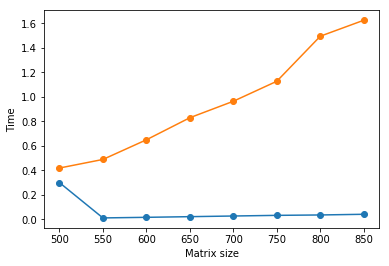

In [1]:
from __future__ import print_function
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import time

def get_times(maximum_time):

    device_times = {
        "/gpu:0":[],
        "/cpu:0":[]
    }
    matrix_sizes = range(500,50000,50)

    for size in matrix_sizes:
        for device_name in device_times.keys():

            print("####### Calculating on the " + device_name + " #######")

            shape = (size,size)
            data_type = tf.float16
            with tf.device(device_name):
                r1 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                r2 = tf.random_uniform(shape=shape, minval=0, maxval=1, dtype=data_type)
                dot_operation = tf.matmul(r2, r1)


            with tf.Session(config=tf.ConfigProto(log_device_placement=True)) as session:
                    start_time = time.time()
                    result = session.run(dot_operation)
                    time_taken = time.time() - start_time
                    print(result)
                    device_times[device_name].append(time_taken)

            print(device_times)

            if time_taken > maximum_time:
                return device_times, matrix_sizes


device_times, matrix_sizes = get_times(1.5)
gpu_times = device_times["/gpu:0"]
cpu_times = device_times["/cpu:0"]

plt.plot(matrix_sizes[:len(gpu_times)], gpu_times, 'o-')
plt.plot(matrix_sizes[:len(cpu_times)], cpu_times, 'o-')
plt.ylabel('Time')
plt.xlabel('Matrix size')
plt.show()

In [5]:
import numpy as np
np.array(gpu_times).mean(), np.array(cpu_times).mean()

(0.061139494180679321, 0.95049941539764404)